In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

from source_code.SqlCo import Sqldd

Autosave disabled


In [2]:
# path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\data\Rapport'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=0, header=0)
#     li.append(df)
#     os.unlink(filename)

# frame = pd.concat(li, axis=0, ignore_index=True)
# frame

In [3]:
tip = Sqldd()
cnx, cursor = tip.get_bdd_co()
frame = pd.read_sql(f"SELECT * FROM cov_rapport;", con=cnx) 

In [4]:
frame

,id,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,1,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,3,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,4,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,5,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...,...
1899,1920,2020-10-08,United Kingdom,540873.0,544275.0,42486.0,42515.0,-3402.0,-29.0
1900,1921,2020-10-08,Germany,308285.0,310144.0,9576.0,9578.0,-1859.0,-2.0
1901,1922,2020-10-08,Iran,482634.0,483844.0,27614.0,27658.0,-1210.0,-44.0
1902,1923,2020-10-08,Turkey,328788.0,329138.0,8601.0,8609.0,-350.0,-8.0


In [5]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [6]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  12271.061974789916
RMSE =  43432.78567841078


In [7]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  325.80252100840335
RMSE =  828.493689213881


In [8]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  91505.41899441341
RMSE =  137859.0788069368
-- World performances for deaths --
MAE =  1995.0949720670392
RMSE =  2429.737006712395


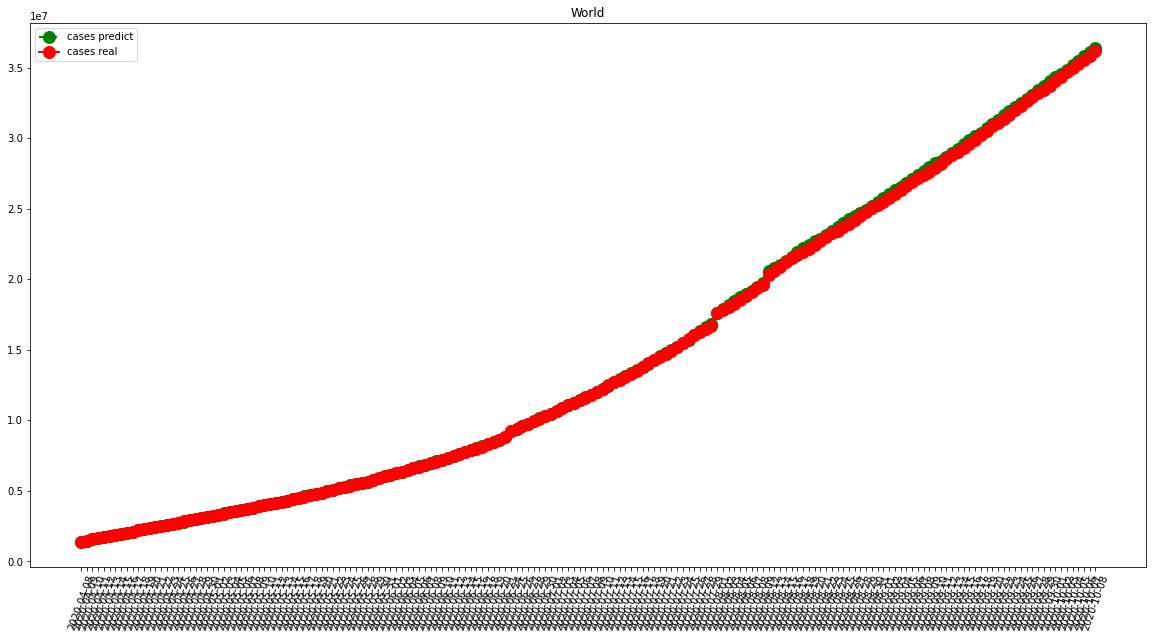

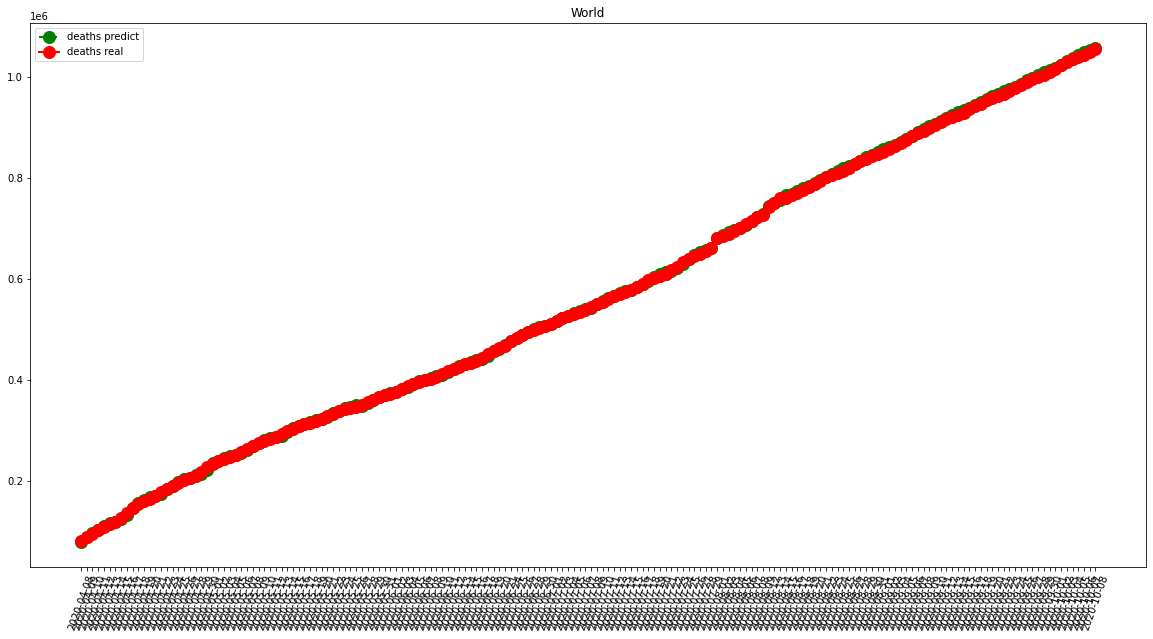

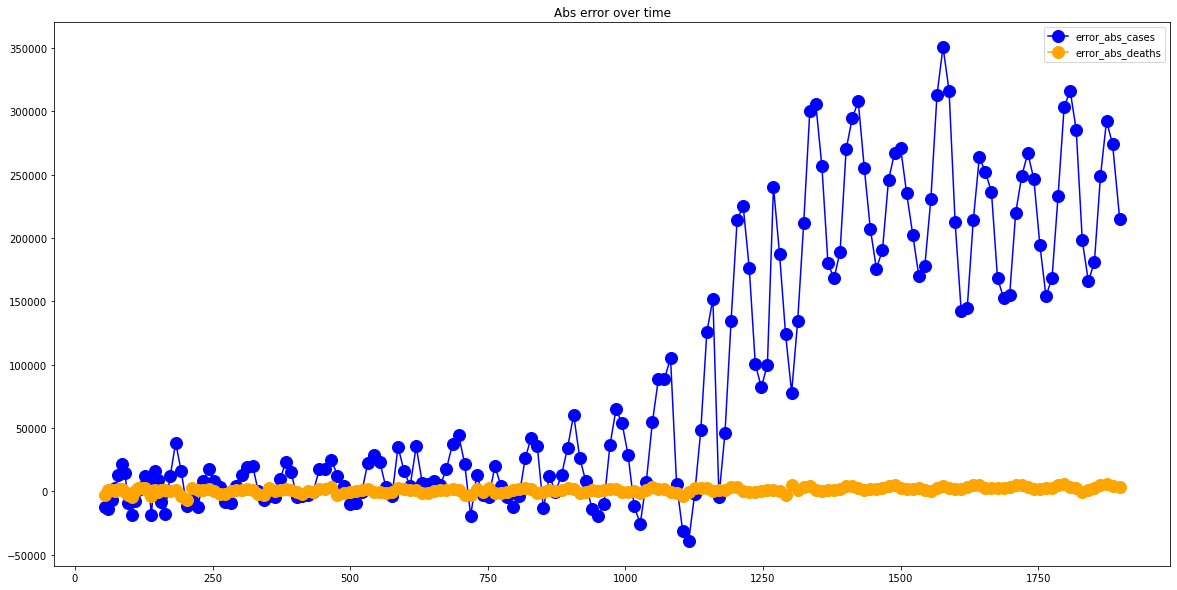

In [9]:
visShow("World")

-- France performances for cases --
MAE =  1494.3174603174602
RMSE =  2436.060448333848
-- France performances for deaths --
MAE =  105.46560846560847
RMSE =  244.8770666636175


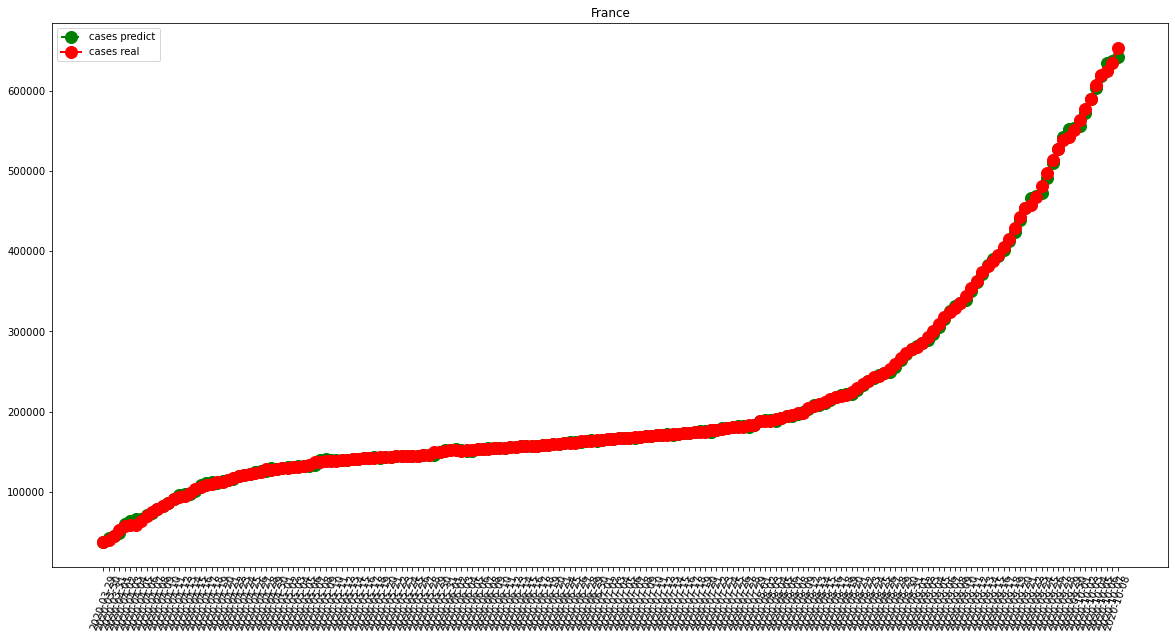

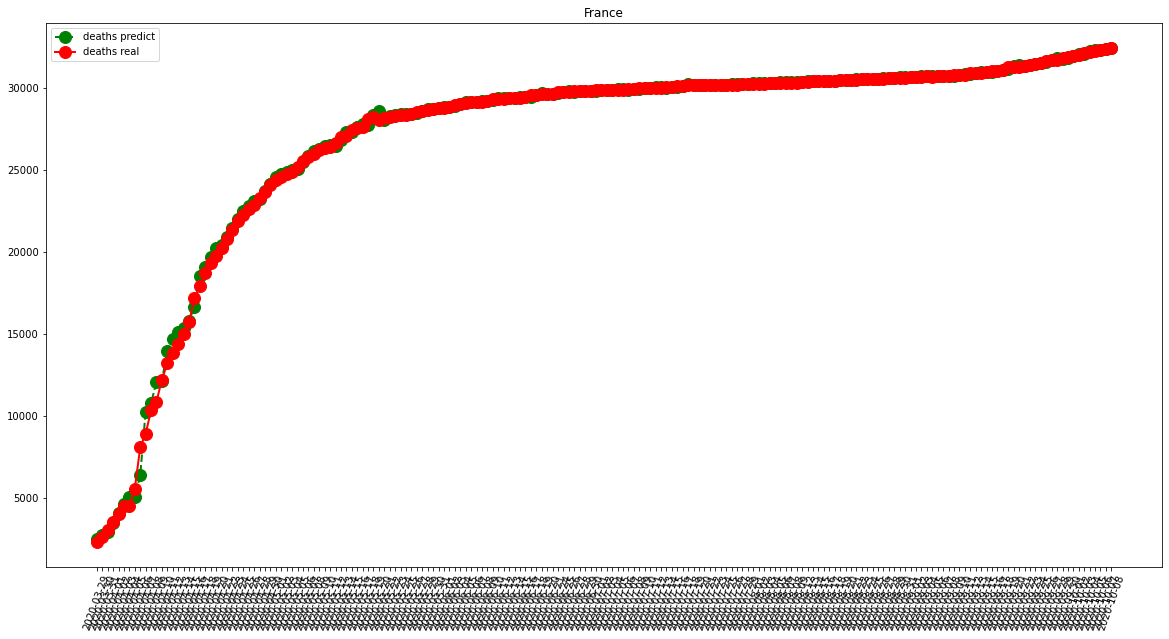

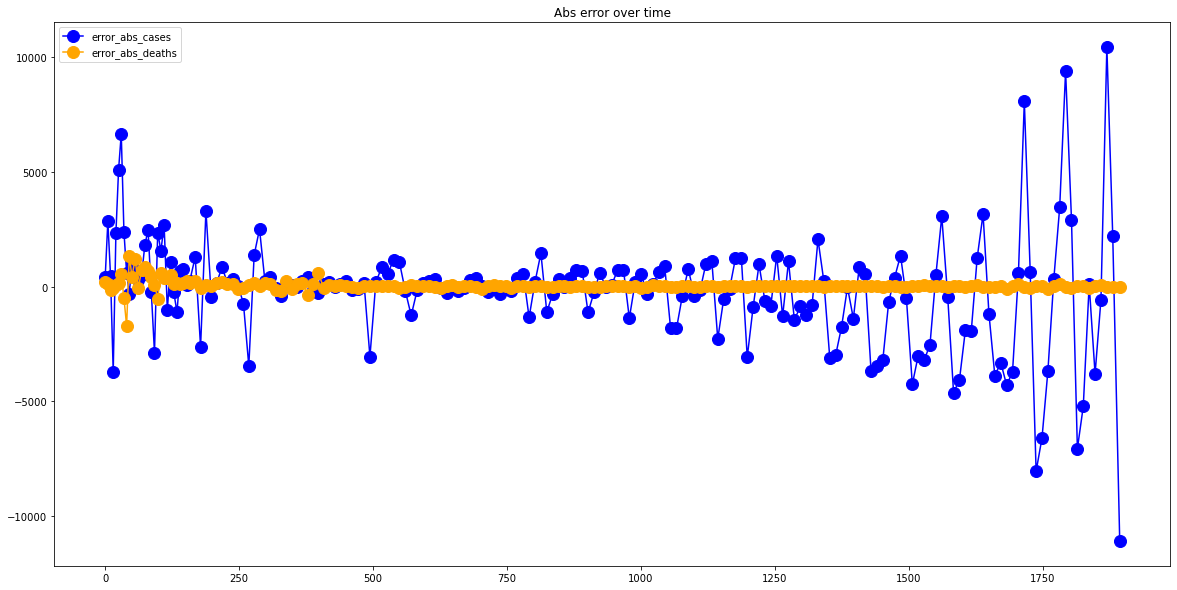

In [10]:
visShow("France")

-- Italy performances for cases --
MAE =  322.5978835978836
RMSE =  471.44954338473167
-- Italy performances for deaths --
MAE =  61.888888888888886
RMSE =  216.04209123498407


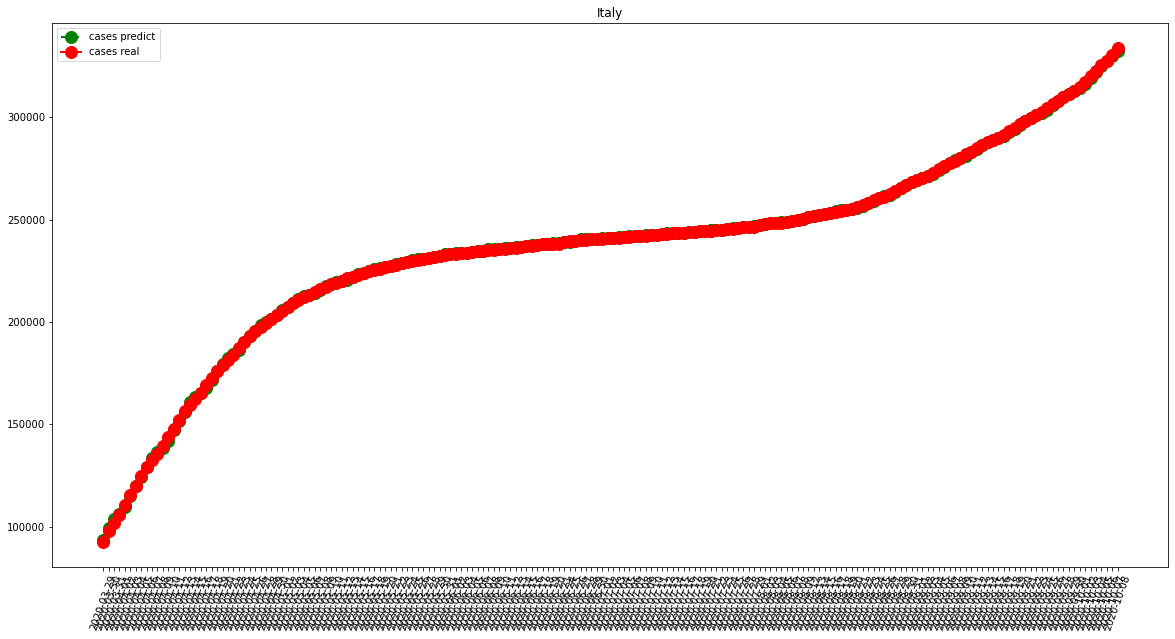

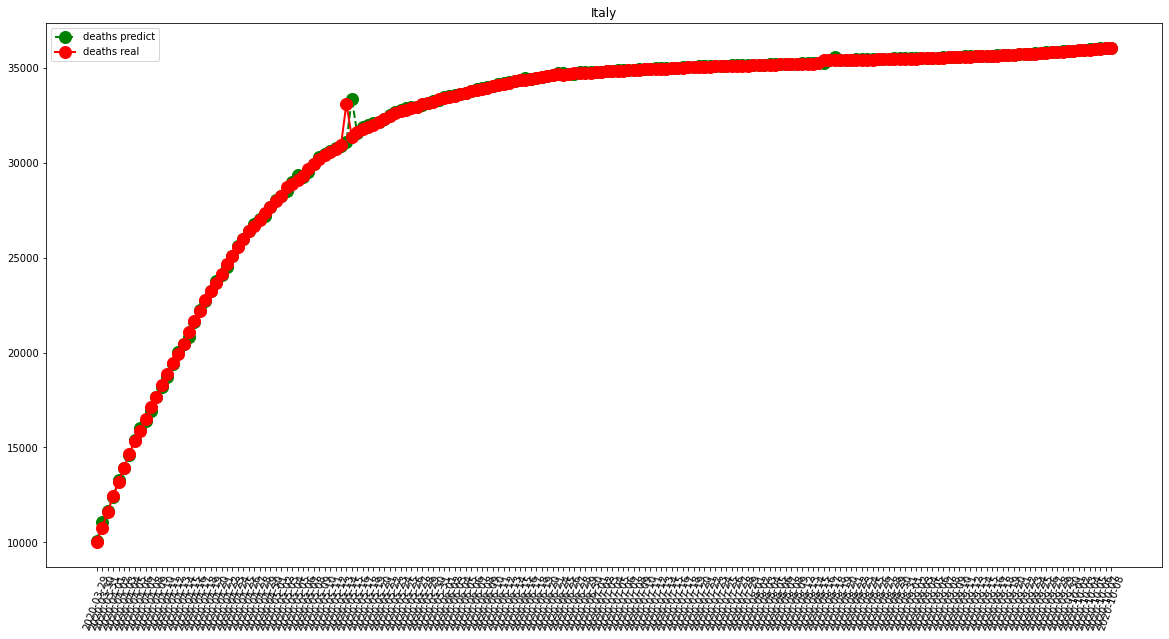

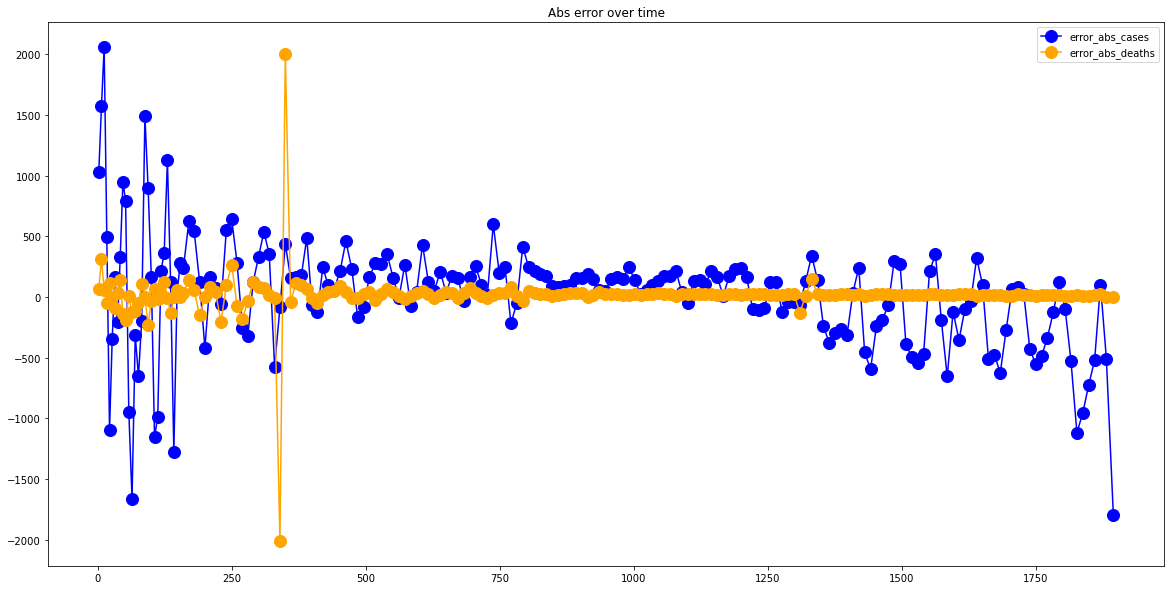

In [11]:
visShow("Italy")

-- Spain performances for cases --
MAE =  3021.2041884816754
RMSE =  5755.186341204733
-- Spain performances for deaths --
MAE =  118.12041884816755
RMSE =  297.8643266120715


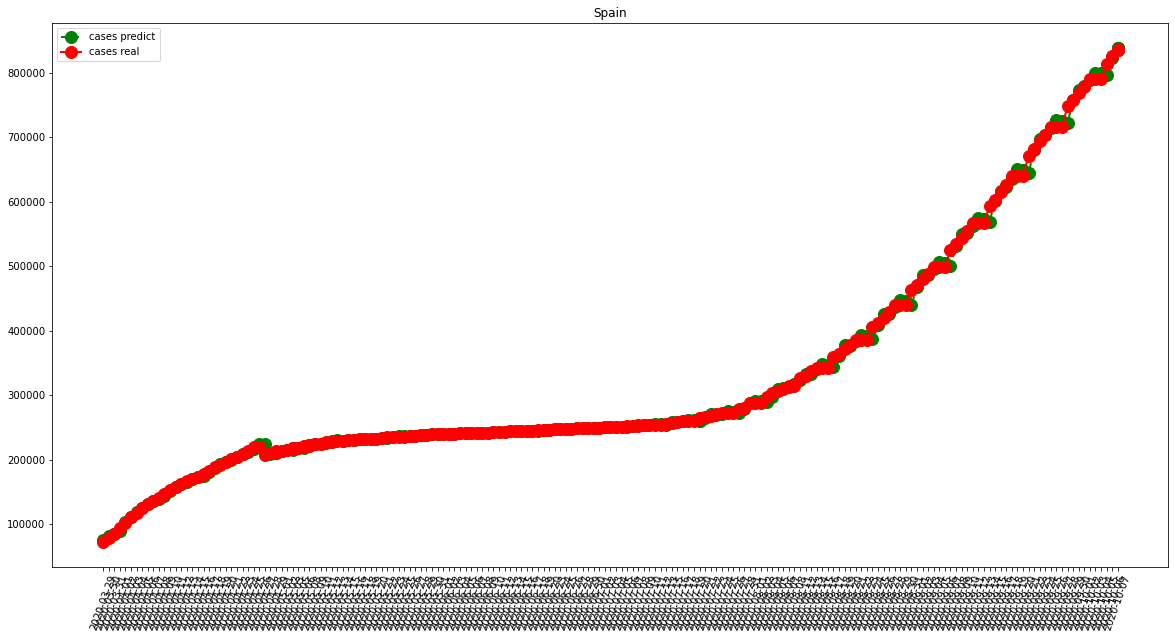

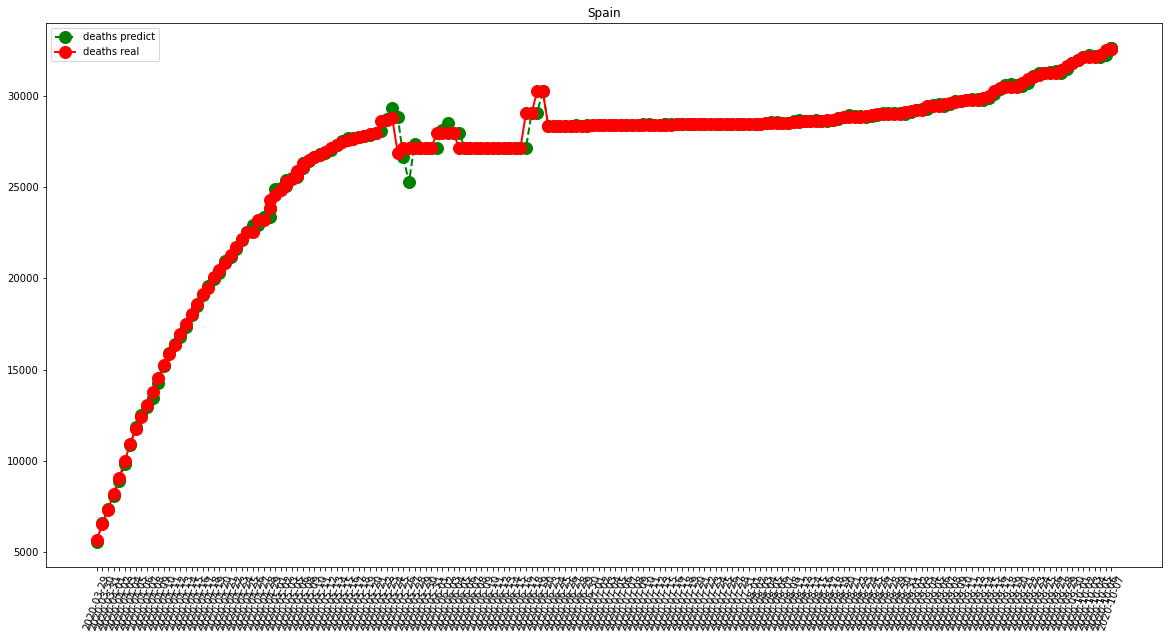

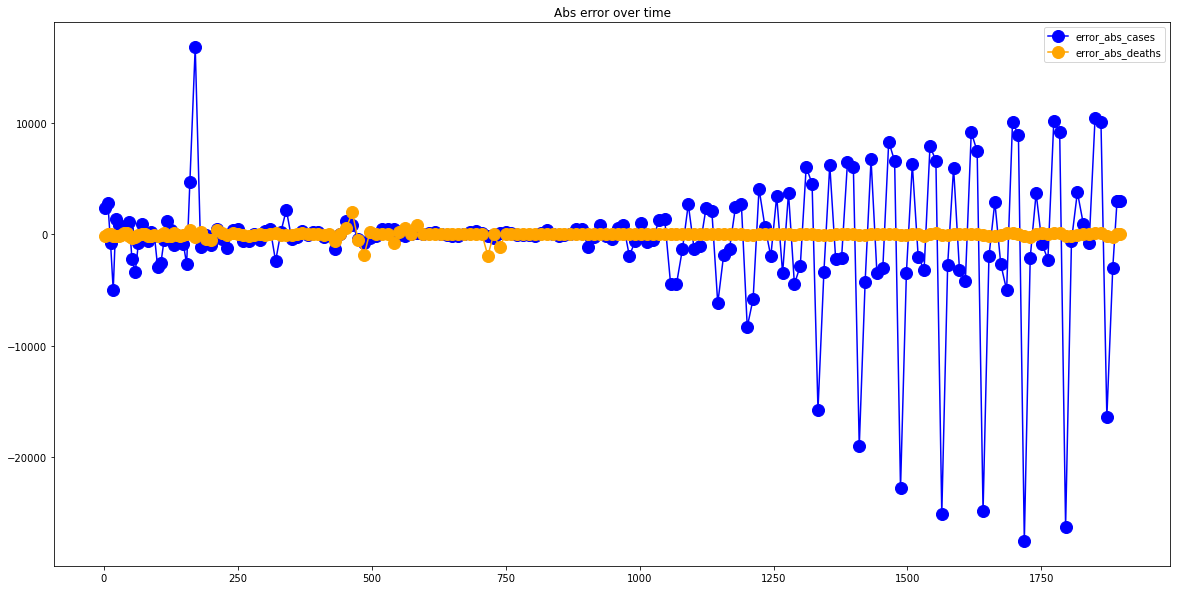

In [12]:
visShow("Belgium")

-- United States performances for cases --
MAE =  16943.640211640213
RMSE =  24022.7673790982
-- United States performances for deaths --
MAE =  475.4973544973545
RMSE =  661.1856874037076


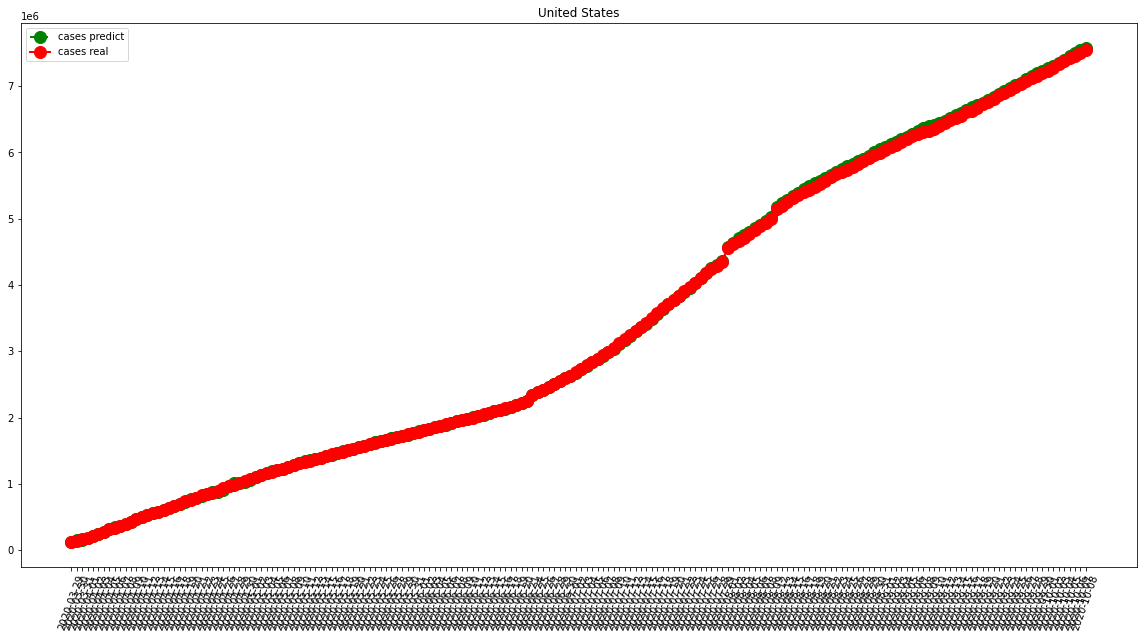

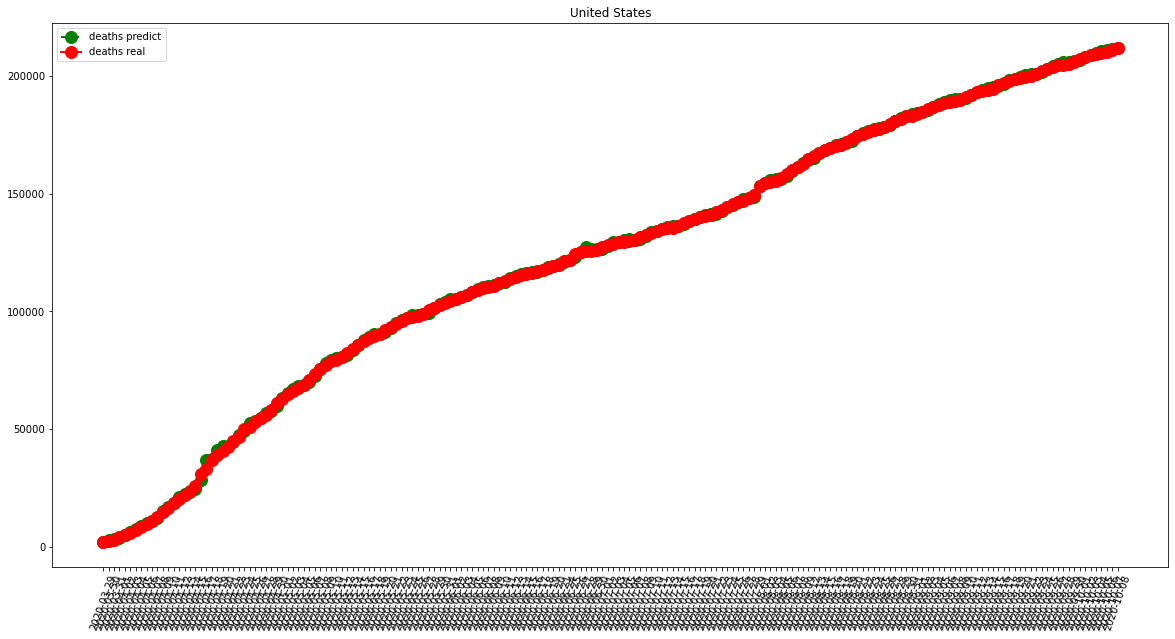

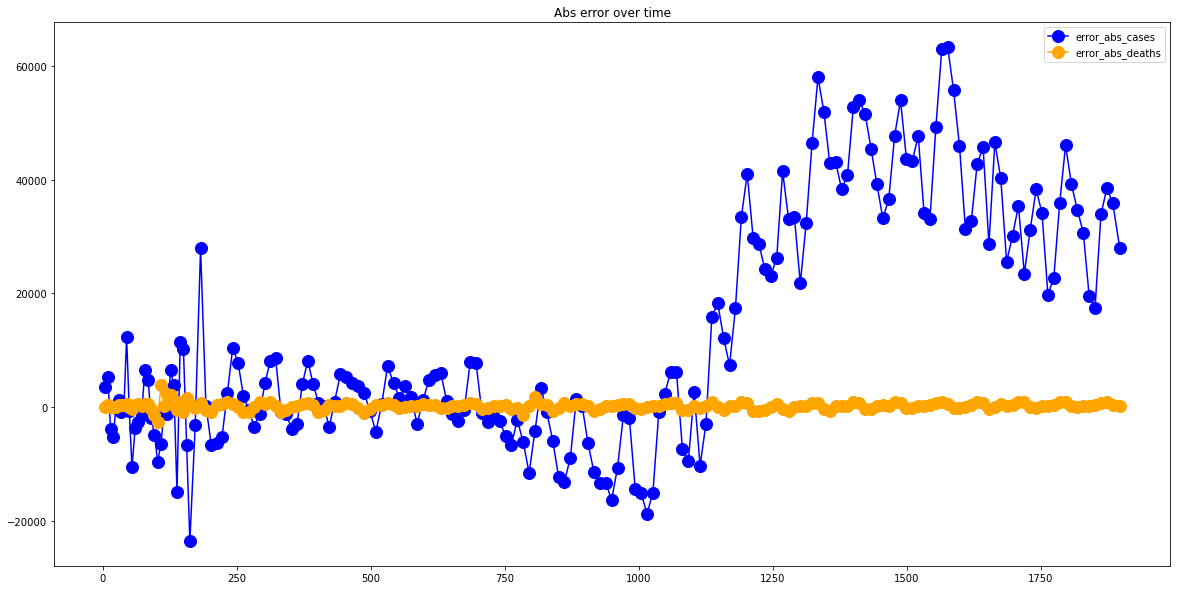

In [13]:
visShow("United States")

-- China performances for cases --
MAE =  60.53439153439153
RMSE =  105.11306585651764
-- China performances for deaths --
MAE =  23.005291005291006
RMSE =  114.23881974402543


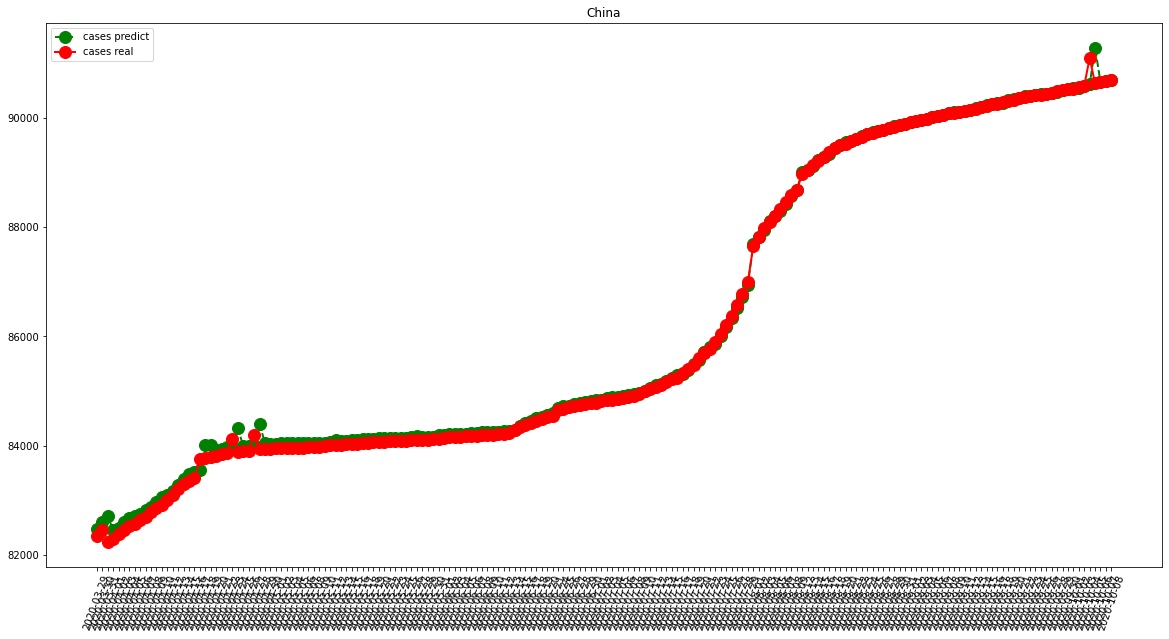

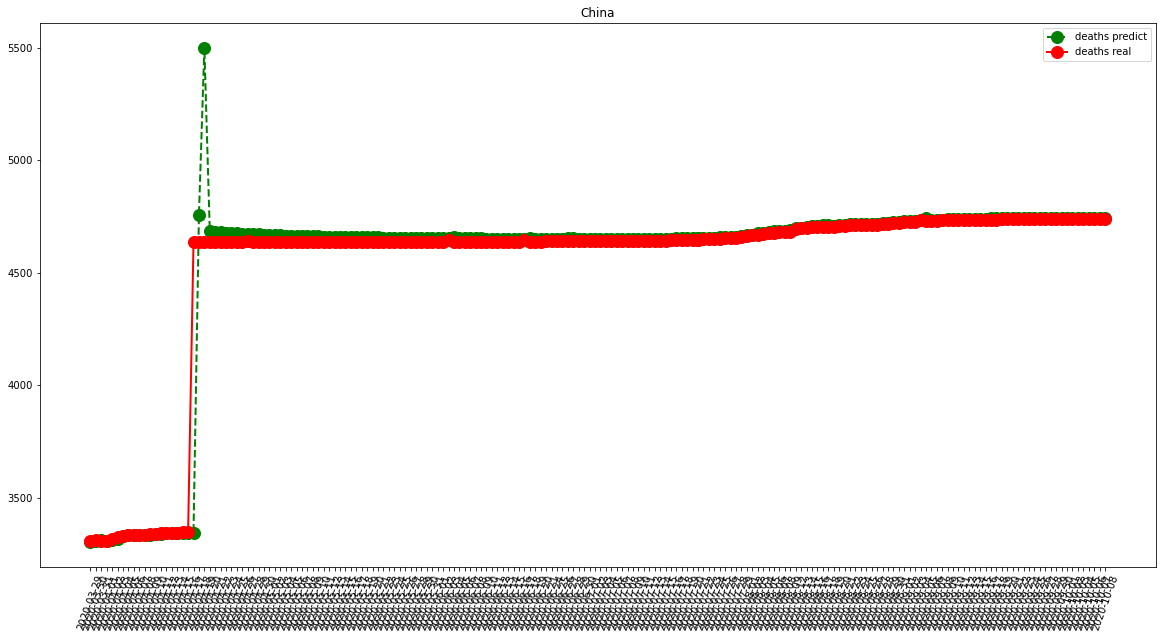

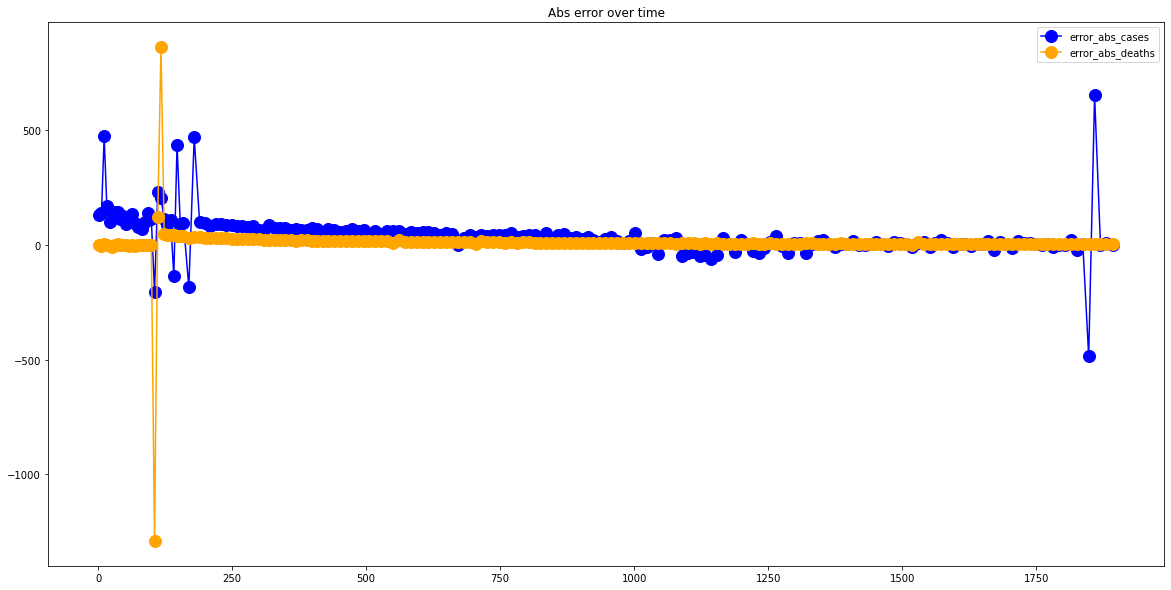

In [14]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1280.4099378881988
RMSE =  3733.7459916864705
-- United Kingdom performances for deaths --
MAE =  194.40372670807454
RMSE =  672.7445178783723


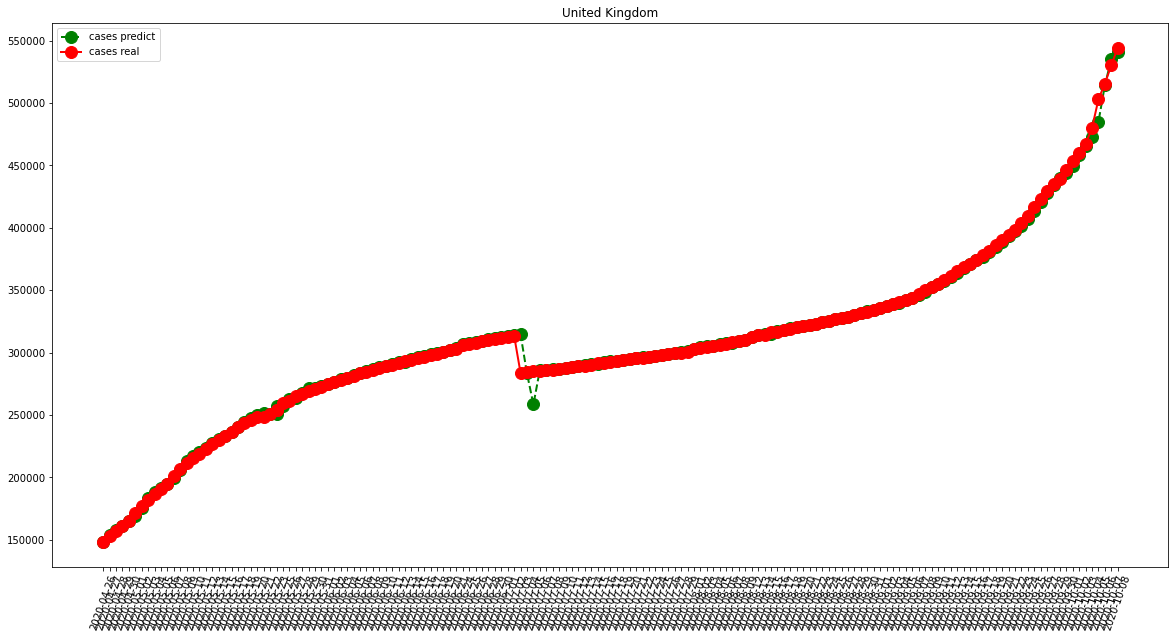

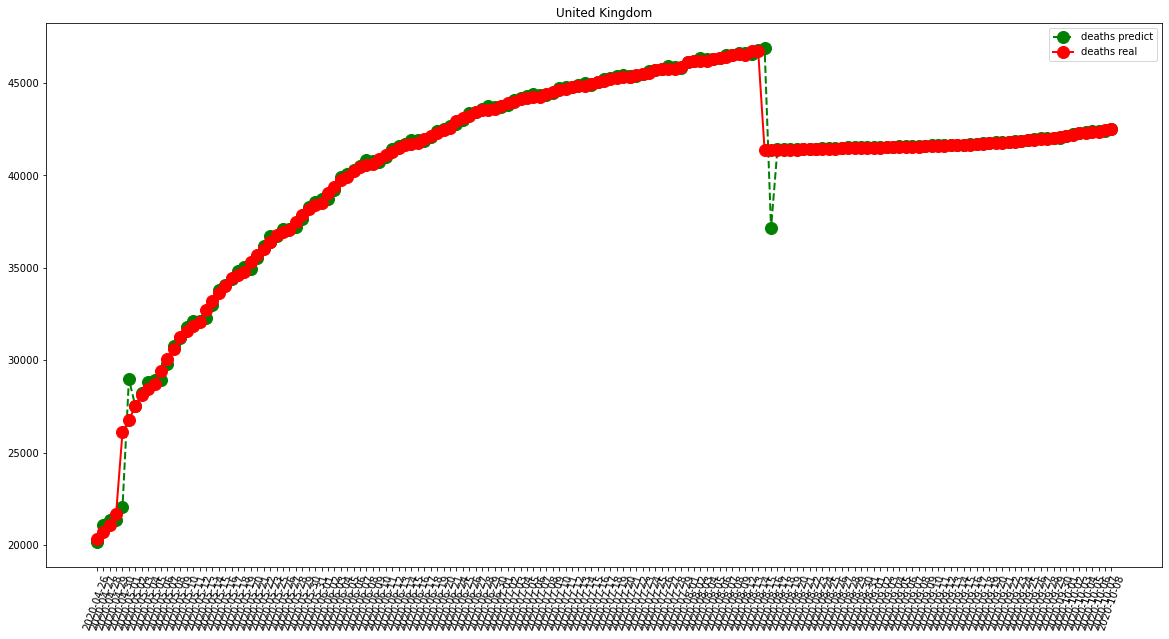

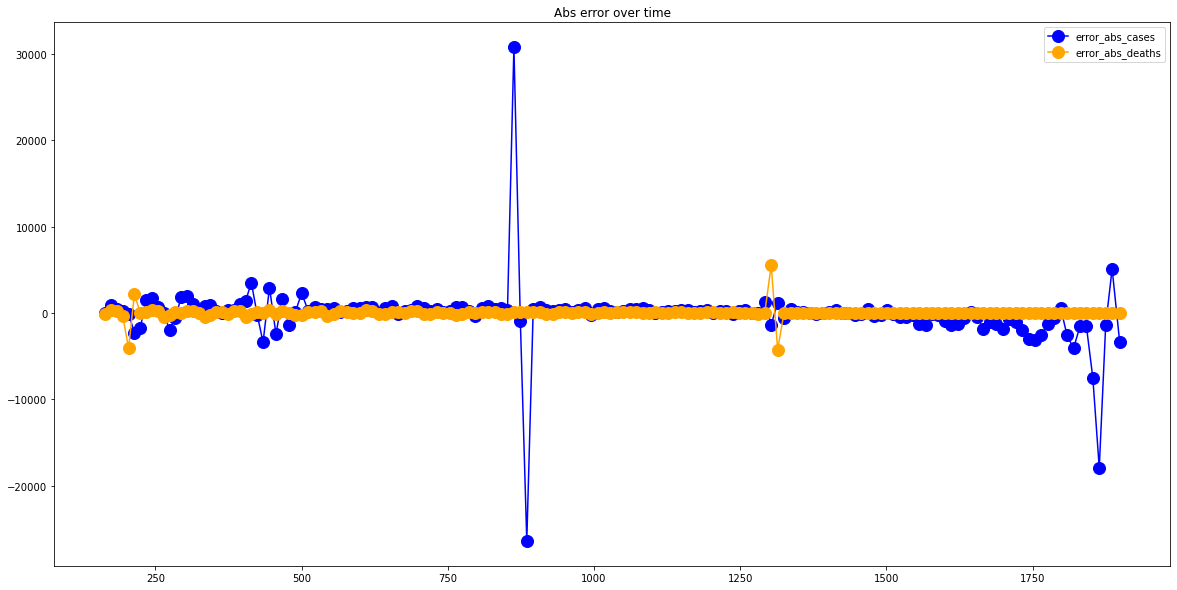

In [15]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  455.62111801242236
RMSE =  625.1871222987553
-- Germany performances for deaths --
MAE =  17.683229813664596
RMSE =  34.83260769747524


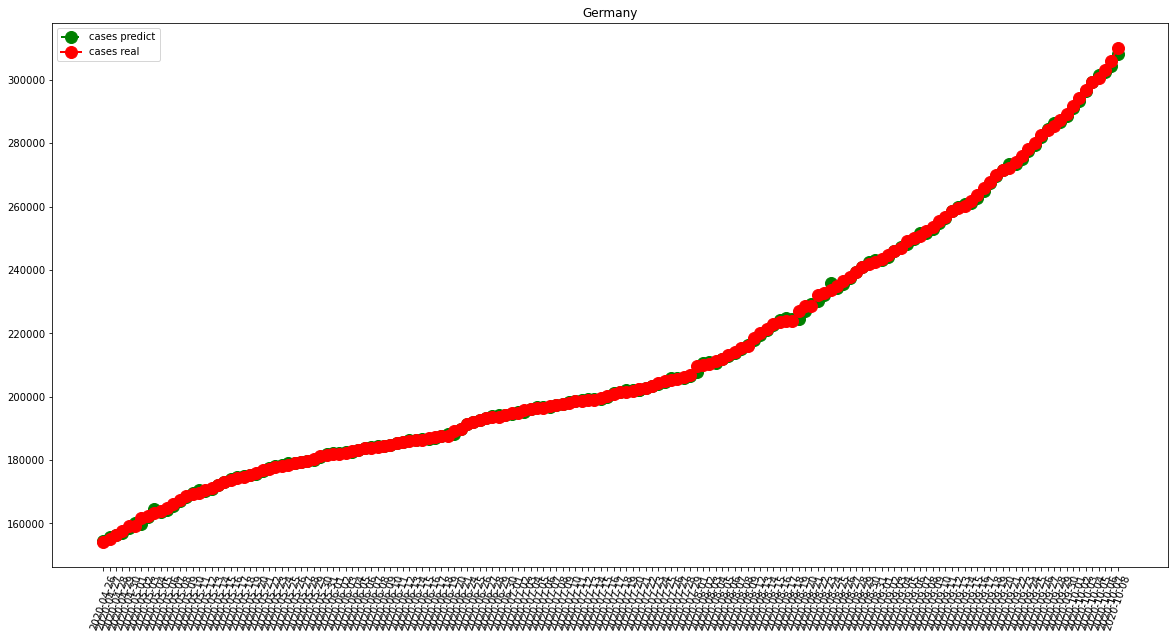

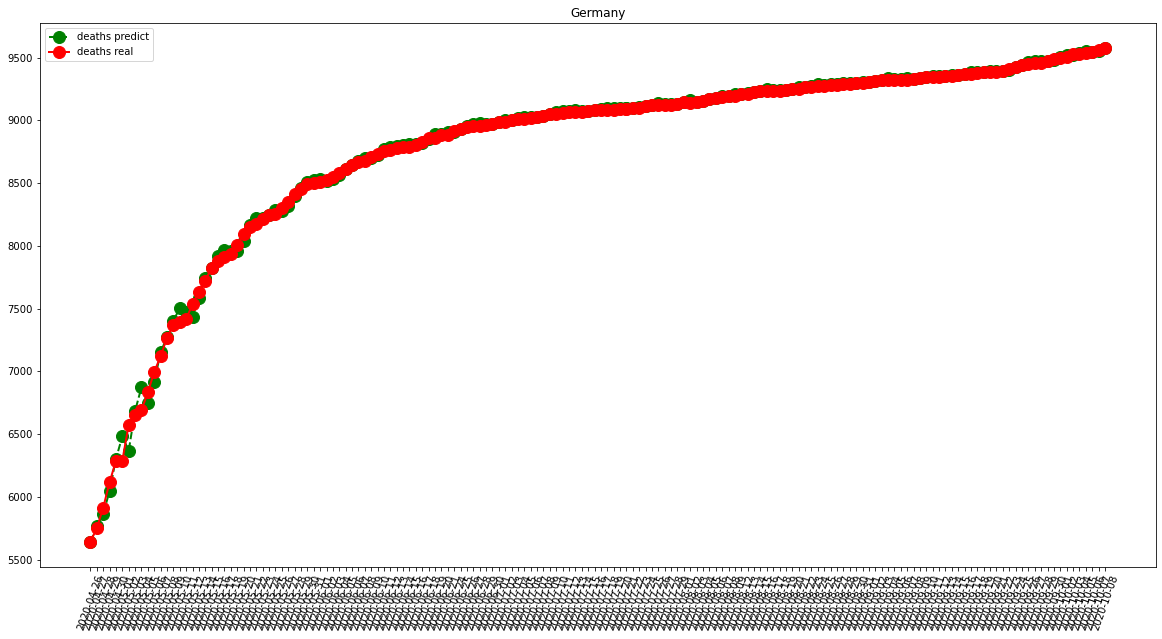

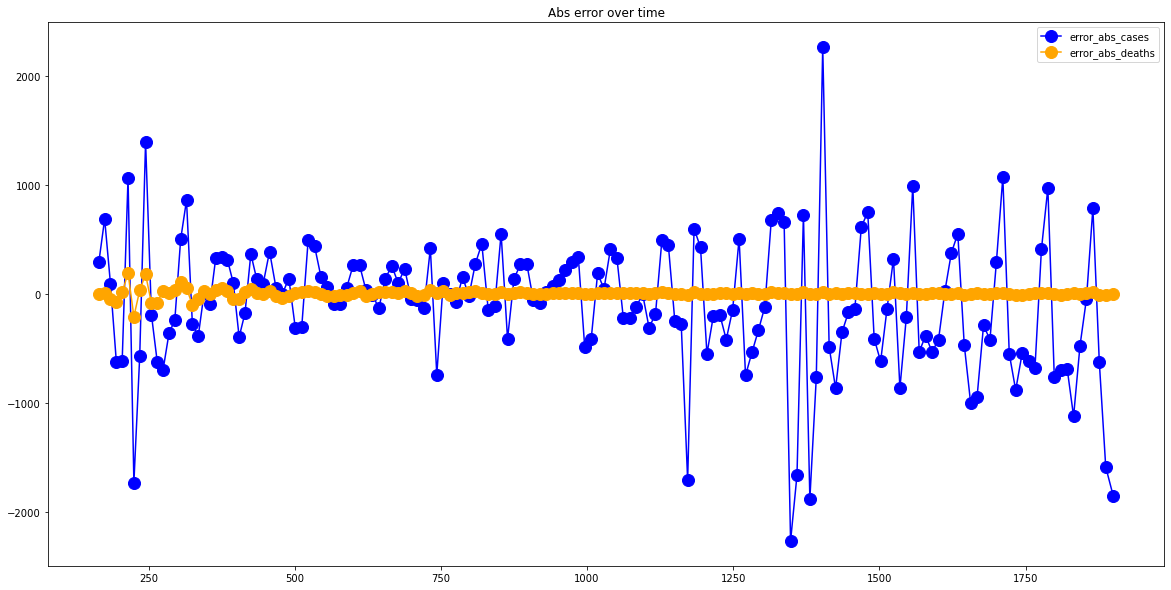

In [16]:
visShow("Germany")

-- Iran performances for cases --
MAE =  848.7391304347826
RMSE =  1185.1479321662812
-- Iran performances for deaths --
MAE =  48.962732919254655
RMSE =  81.21014072467636


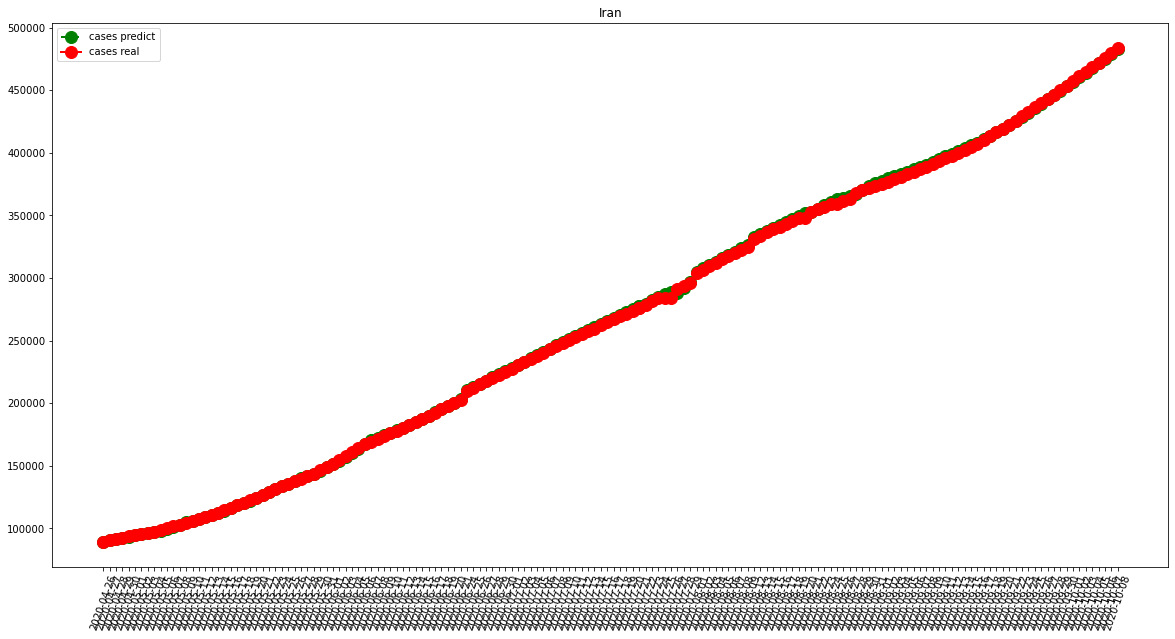

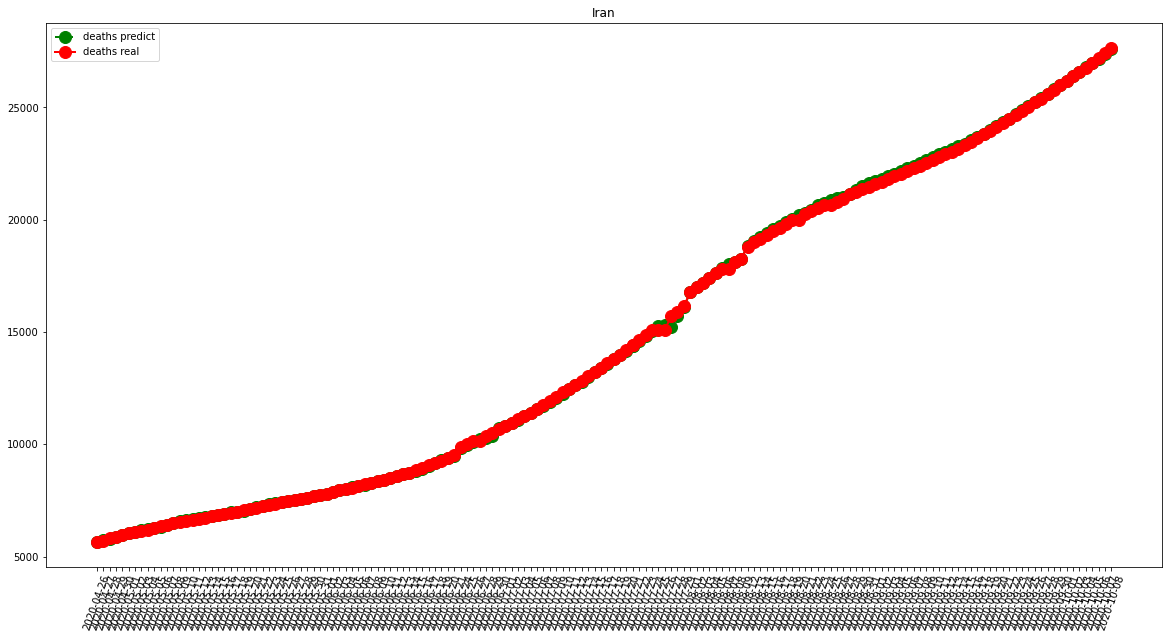

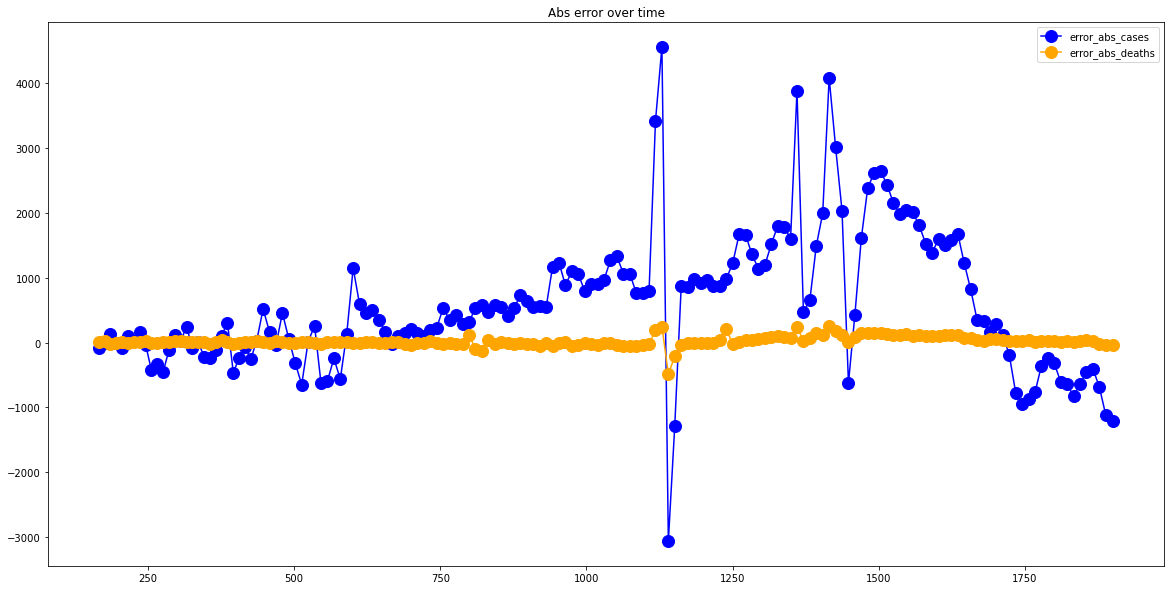

In [17]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  230.7826086956522
RMSE =  330.29476765515477
-- Turkey performances for deaths --
MAE =  15.347826086956522
RMSE =  80.2951465470125


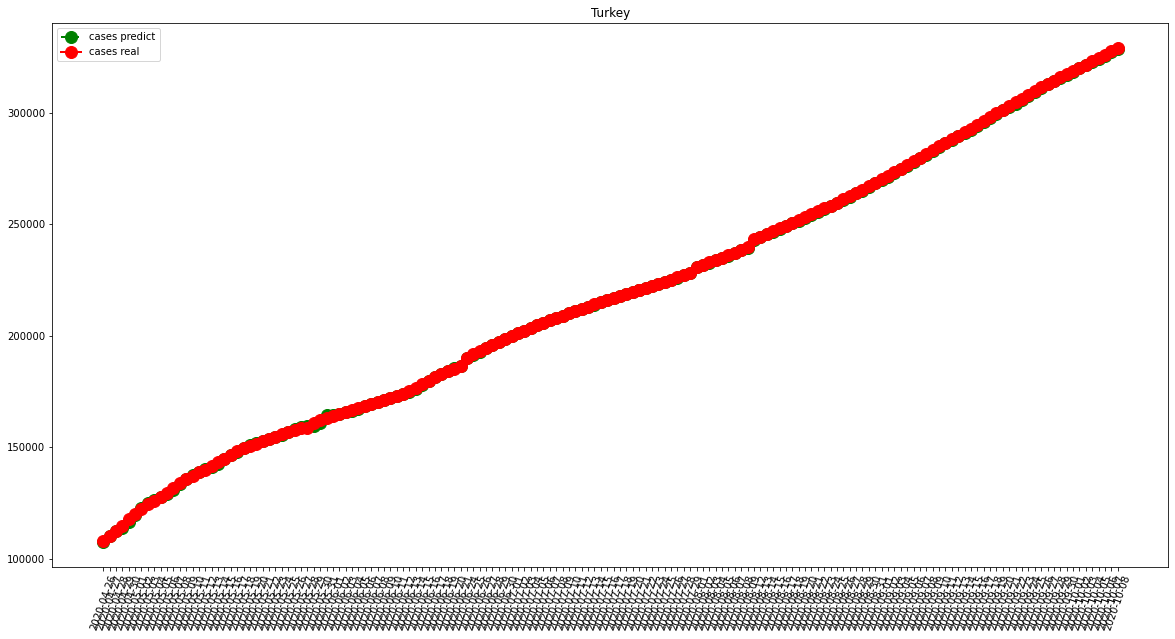

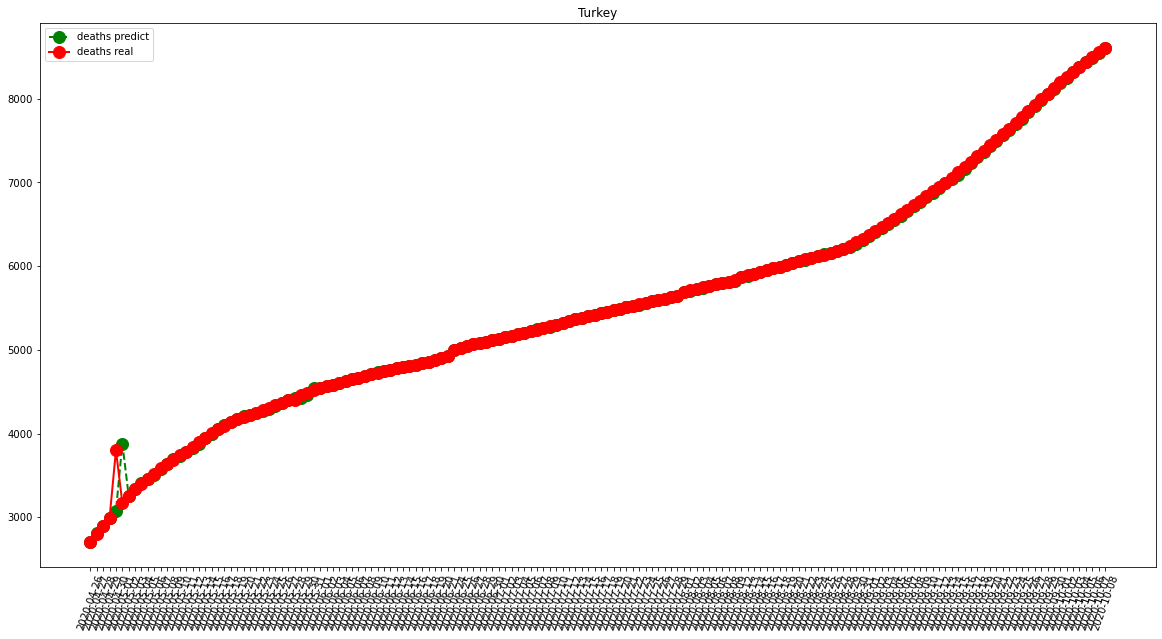

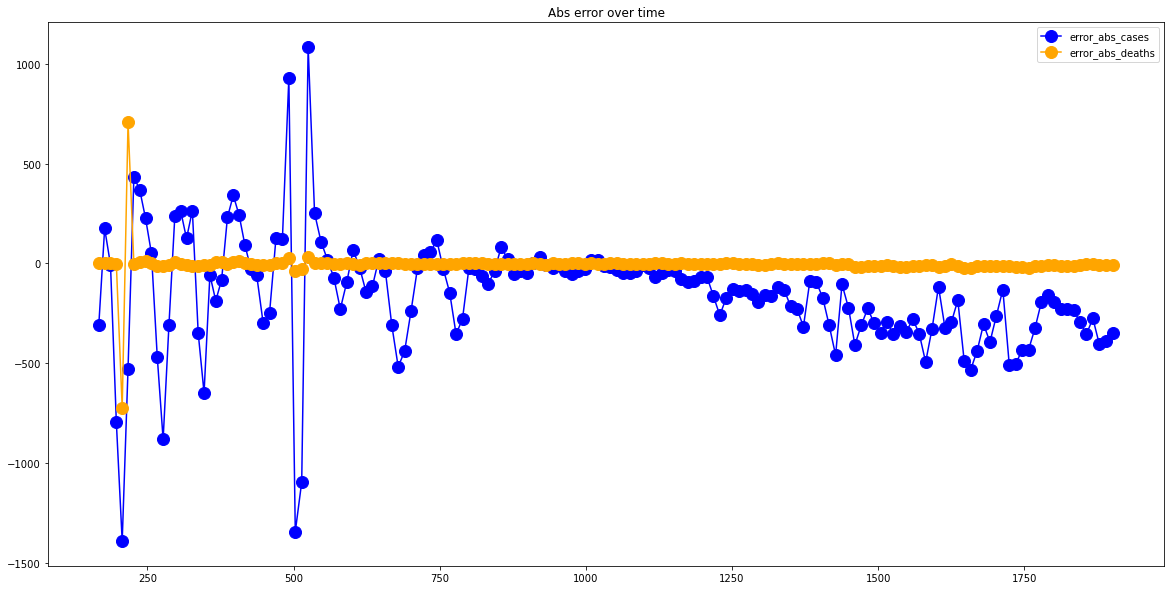

In [18]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17888.746268656716
RMSE =  22967.761011807885
-- Brazil performances for deaths --
MAE =  524.6119402985074
RMSE =  627.7619688641856


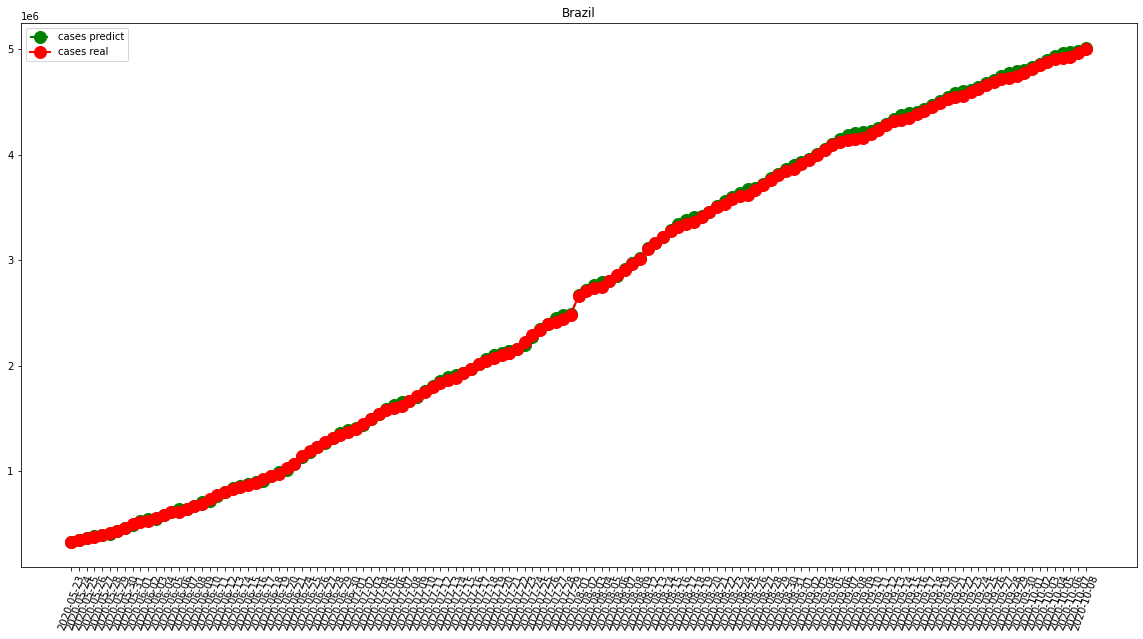

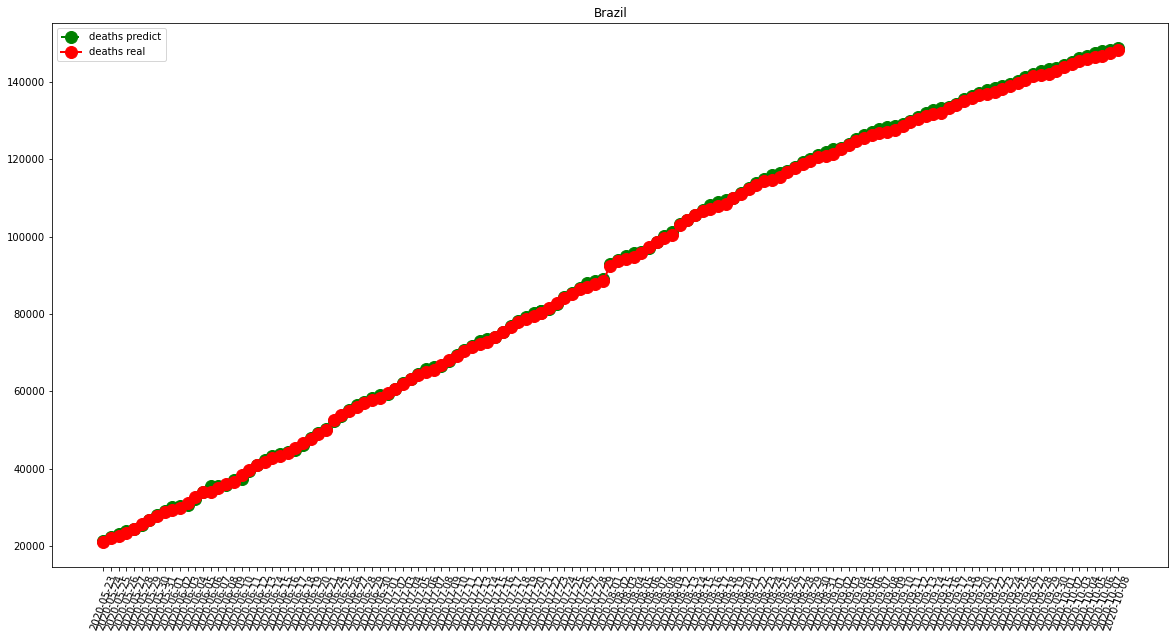

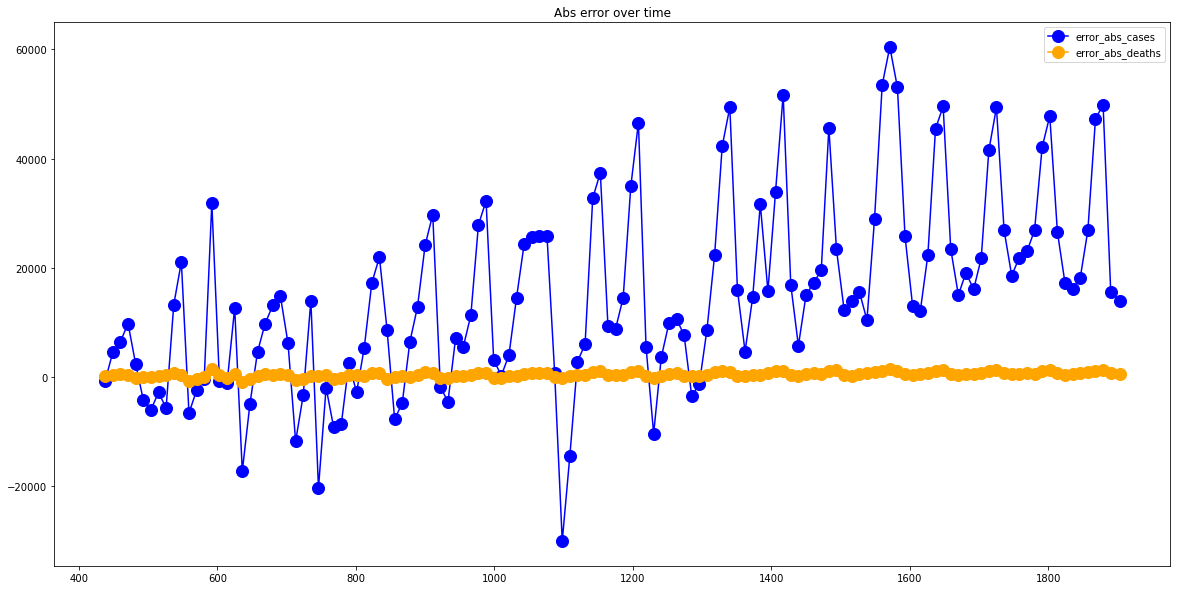

In [19]:
visShow("Brazil")

In [18]:
# frame.to_csv(f"data\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)